# Exploring Machine Learning Scenarios

> The summary of "Fundamental of tinyML" from Harvard University.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
print('Tensorflow: v' + tf.__version__)

Tensorflow: v2.3.1


## Exploring Convolutions

### What are Convolutions?

What are convolutions? In this lab you'll explore what they are and how they work. In later lessons, you'll see how to use them in your neural network.

Together with convolutions, you'll use something called 'Pooling', which compresses your image, further emphasising the features. You'll also see how pooling works in this lab. 

### Limitations of the previous DNN

In an earlier exercise you saw how to train an image classifier for fashion items using the Fashion MNIST dataset. This gave you a pretty accuract classifier, but there was an obvious constraint: the images were 28x28, grey scale and the item was centered in the image. 

For example here are a couple of the images in Fashion MNIST
![Picture of a sweater and a boot](https://cdn-images-1.medium.com/max/1600/1*FekMt6abfFFAFzhQcnjxZg.png)

The DNN that you created simply learned from the raw pixels what made up a sweater, and what made up a boot in this context. But consider how it might classify this image?

![image of boots](https://cdn.pixabay.com/photo/2013/09/12/19/57/boots-181744_1280.jpg)

(Image is Public domain CC0 from Pixabay: https://pixabay.com/photos/boots-travel-railroad-tracks-181744/)

While it's clear that there are boots in this image, the classifier would fail for a number of reasons. First, of course, it's not 28x28 greyscale, but more importantly, the classifier was trained on the raw pixels of a left-facing boot, and not the features that make up what a boot is.

That's where Convolutions are very powerful. A convolution is a filter that passes over an image, processing it, and extracting features that show a commonolatity in the image. In this lab you'll see how they work, but processing an image to see if you can extract features from it!

Generating convolutions is very simple -- you simply scan every pixel in the image and then look at it's neighboring pixels. You multiply out the values of these pixels by the equivalent weights in a filter. 

So, for example, consider this:

![Convolution on image](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig1.png)

In this case a 3x3 Convolution is specified.

The current pixel value is 192, but you can calculate the new one by looking at the neighbor values, and multiplying them out by the values specified in the filter, and making the new pixel value the final amount.



Let's explore how convolutions work by creating a basic convolution on a 2D Grey Scale image. First we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines. Let's start by importing some python libraries.

In [3]:
import cv2
from scipy import misc

i = misc.ascent()

Next, we can use the pyplot library to draw the image so we know what it looks like.

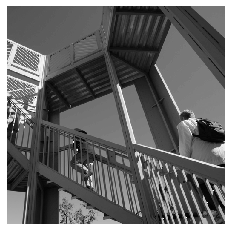

In [4]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

We can see that this is an image of a stairwell. There are lots of features in here that we can play with seeing if we can isolate them -- for example there are strong vertical lines.

The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get the dimensions of the image so we can loop over it later. 

In [5]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

Now we can create a filter as a 3x3 array.

In [6]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter. 

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image. 

In [7]:
for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        convolution = 0.0
        convolution += (i[x - 1, y - 1] * filter[0][0])
        convolution += (i[x, y - 1] * filter[0][1])
        convolution += (i[x + 1, y - 1] * filter[0][2])
        convolution += (i[x - 1, y] * filter[1][0])
        convolution += (i[x, y] * filter[1][1])
        convolution += (i[x + 1, y] * filter[1][2])
        convolution += (i[x - 1, y + 1] * filter[2][0])
        convolution += (i[x, y + 1] * filter[2][1])
        convolution += (i[x + 1, y + 1] * filter[2][2])
        convolution *= weight
        
        if convolution < 0:
            convolution = 0
        elif convolution > 255:
            convolution = 255
        i_transformed[x, y] = convolution

Now we can plot the image to see the effect of the convolution!

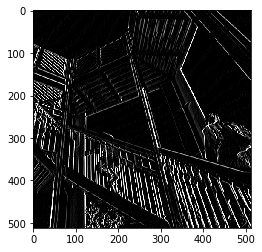

In [8]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

So, consider the following filter values, and their impact on the image.

Using -1,0,1,-2,0,2,-1,0,1 gives us a very strong set of vertical lines:

![Detecting vertical lines filter](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig2.png)

Using -1, -2, -1, 0, 0, 0, 1, 2, 1 gives us horizontal lines:

![Detecting horizontal lines](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig3.png)

Explore different values for yourself! 

### Pooling

As well as using convolutions, pooling helps us greatly in detecting features. The goal is to reduce the overall amount of information in an image, while maintaining the features that are detected as present. 

There are a number of different types of pooling, but for this lab we'll use one called MAX pooling. 

 The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest (hence the name MAX pooling) of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

![Max Pooling](https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/lab3-fig4.png)

This code will show a (2, 2) pooling.Run it to see the output, and you'll see that while the image is 1/4 the size of the original, the extracted features are maintained!

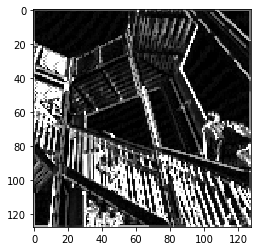

In [9]:
new_x = int(size_x/4)
new_y = int(size_y/4)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 4):
  for y in range(0, size_y, 4):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x+2, y])
    pixels.append(i_transformed[x+3, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.append(i_transformed[x+2, y+1])
    pixels.append(i_transformed[x+3, y+1])
    pixels.append(i_transformed[x, y+2])
    pixels.append(i_transformed[x+1, y+2])
    pixels.append(i_transformed[x+2, y+2])
    pixels.append(i_transformed[x+3, y+2])
    pixels.append(i_transformed[x, y+3])
    pixels.append(i_transformed[x+1, y+3])
    pixels.append(i_transformed[x+2, y+3])
    pixels.append(i_transformed[x+3, y+3])
    pixels.sort(reverse=True)
    newImage[int(x/4),int(y/4)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      

## Fashion-MNIST Convlution

### Improving Computer Vision Accuracy using Convolutions

In previous section, you saw how to do image recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. 

In [10]:
mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_val, y_val) = mnist.load_data()

X_train = X_train / 255.0
X_val = X_val / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5814 - accuracy: 0.8006 - val_loss: 0.4716 - val_accuracy: 0.8353
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4361 - accuracy: 0.8493 - val_loss: 0.4554 - val_accuracy: 0.8429
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4047 - accuracy: 0.8593 - val_loss: 0.4246 - val_accuracy: 0.8549
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3860 - accuracy: 0.8653 - val_loss: 0.4135 - val_accuracy: 0.8551
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3712 - accuracy: 0.8691 - val_loss: 0.4234 - val_accuracy: 0.8517
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3617 - accuracy: 0.8725 - val_loss: 0.3960 - val_accuracy: 0.8625
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3518 - accuracy: 0.8747 - val_loss: 0.4063 - val_accuracy:

Your accuracy is probably about 89% on training and 87% on validation...not bad...But how do you make that even better? One way is to use something called Convolutions. I'm not going to get into the details of Convolutions here, but the ultimate concept is that they narrow down the content of the image to focus on specific, distinct, features. 

If you've ever done image processing using a filter (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing)) then convolutions will look very familiar.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision, because often it's features like edges that distinguish one item for another. And once we move from raw image data to feature data, the amount of information needed is then much less...because you'll just train on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

Run the below code -- this is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but look at the impact on the accuracy:

In [12]:
(X_train, y_train), (X_val, y_val) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1)
X_train = X_train / 255.

X_val = X_val.reshape(10000, 28, 28, 1)
X_val = X_val / 255.

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                32020     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

It's likely gone up to about 97% on the training data and 91% on the validation data. 

That's significant, and a step in the right direction!

Try running it for more epochs -- say about 100, and explore the results! But while the results might seem really good, the validation results may actually go down, due to something called 'overfitting' which will be discussed later. 

(In a nutshell, 'overfitting' occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at seeing *other* data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it, but blue suade shoes might confuse you...and you know you should never mess with my blue suede shoes.)

Then, look at the code again, and see, step by step how the Convolutions were built:

### Step 1 
Gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape. 

```python
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```

### Step 2
Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

1. The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 64
2. The size of the Convolution, in this case a 3x3 grid
3. The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
4. In the first layer, the shape of the input data.

You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image to 25% of its original size.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way. 

```python
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```

Add another convolution

```python
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```

Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version

```python
  tf.keras.layers.Flatten(),
```

The same 128 dense layers, and 10 output layers as in the pre-convolution example:



```python
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```

### Step 3

Now compile the model, call the fit method to do the training, and evaluate the loss and accuracy from the test set.



```python
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```


